In [275]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

In [276]:
iris = sns.load_dataset(name= 'iris')

In [277]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [278]:
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

print(X.shape, y.shape)

(4, 2) (4, 1)


In [279]:
class MLP:
    def __init__(self, epochs, learning_rate, input_layer,hidden_layer,output_layer, reg_param = 0,m=4):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.reg_param = reg_param 
        self.m = m
        self.W1 = np.random.normal(0,1,(hidden_layer,input_layer))
        self.W2 = np.random.normal(0,1,(output_layer,hidden_layer))
        self.B1 = np.random.random((hidden_layer, 1)) # 2x1
        self.B2 = np.random.random((output_layer, 1)) # 1x1
        self.cost = np.zeros((self.epochs, 1))

    
    #Activation function
    def sigmoid(self, z, derv=False):
        if derv: return z * (1 - z)
        return 1 / (1 + np.exp(-z))
    def forward(self, x, predict=False):
        a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

        z2 = self.W1.dot(a1) + self.B1 # 2x2 * 2x1 + 2x1 = 2x1
        a2 = self.sigmoid(z2) # 2x1

        z3 = self.W2.dot(a2) + self.B2 # 1x2 * 2x1 + 1x1 = 1x1
        a3 = sigmoid(z3)

        if predict: return a3
        return (a1, a2, a3)
    def train(self): # The arguments are to bypass UnboundLocalError error
        for i in range(self.epochs):
            c = 0
            
        
            dW1 = 0
            dW2 = 0

            dB1 = 0
            dB2 = 0
        
            for j in range(self.m):
                print("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
                a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

                z1 = self.W1.dot(a0) + self.B1 # 2x2 * 2x1 + 2x1 = 2x1
                a1 = self.sigmoid(z1) # 2x1

                z2 = self.W2.dot(a1) + self.B2 # 1x2 * 2x1 + 1x1 = 1x1
                a2 = self.sigmoid(z2) # 1x1

                # Back prop.
                dz2 = a2 - y[j] # 1x1
                dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

                dz1 = np.multiply((self.W2.T * dz2), self.sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
                dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

                dB1 += dz1 # 2x1
                dB2 += dz2 # 1x1

                c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
            
            self.W1 = self.W1 - self.learning_rate * (dW1 / self.m) + ( (self.reg_param / self.m) * self.W1)
            self.W2 = self.W2 - self.learning_rate * (dW2 / self.m) + ( (self.reg_param / self.m) * self.W2)

            self.B1 = self.B1 - self.learning_rate * (dB1 / self.m)
            self.B2 = self.B2 - self.learning_rate * (dB2 / self.m)
            self.cost[i] = (c / self.m) + ( 
            (self.reg_param / (2 * self.m)) * 
            (
                np.sum(np.power(self.W1, 2)) + 
                np.sum(np.power(self.W2, 2))
            )
            )
        return (self.W1, self.W2, self.B1, self.B2)
    def predict(self):
        # Assigning the axes to the different elements.
        plt.plot(range(self.epochs),self. cost)

        # Labelling the x axis as the iterations axis.
        plt.xlabel("Iterations")

    # Labelling the y axis as the cost axis.
        plt.ylabel("Cost")

        # Showing the plot.
        plt.show()


        
        
        
    

In [280]:
class MLP:
    def __init__(self, epochs, learning_rate, input_layer,hidden_layer,output_layer, reg_param = 0,m=4):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.reg_param = reg_param 
        self.m = m
        self.W1 = np.random.normal(0,1,(hidden_layer,input_layer))
        self.W2 = np.random.normal(0,1,(output_layer,hidden_layer))
        self.B1 = np.random.random((hidden_layer, 1)) # 2x1
        self.B2 = np.random.random((output_layer, 1)) # 1x1
        self.cost = np.zeros((self.epochs, 1))

    
    #Activation function
    def sigmoid(self, z, derv=False):
        if derv: return z * (1 - z)
        return 1 / (1 + np.exp(-z))
    def forward(self, x, predict=False):
        a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

        z2 = self.W1.dot(a1) + self.B1 # 2x2 * 2x1 + 2x1 = 2x1
        a2 = self.sigmoid(z2) # 2x1

        z3 = self.W2.dot(a2) + self.B2 # 1x2 * 2x1 + 1x1 = 1x1
        a3 = sigmoid(z3)

        if predict: return a3
        return (a1, a2, a3)
    def fit(self): # The arguments are to bypass UnboundLocalError error
        for i in range(self.epochs):
            c = 0
            
        
            dW1 = 0
            dW2 = 0

            dB1 = 0
            dB2 = 0
        
            for j in range(self.m):
                print("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
                a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

                z1 = self.W1.dot(a0) + self.B1 # 2x2 * 2x1 + 2x1 = 2x1
                a1 = self.sigmoid(z1) # 2x1

                z2 = self.W2.dot(a1) + self.B2 # 1x2 * 2x1 + 1x1 = 1x1
                a2 = self.sigmoid(z2) # 1x1

                # Back prop.
                dz2 = a2 - y[j] # 1x1
                dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

                dz1 = np.multiply((self.W2.T * dz2), self.sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
                dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

                dB1 += dz1 # 2x1
                dB2 += dz2 # 1x1

                c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
            
            self.W1 = self.W1 - self.learning_rate * (dW1 / self.m) + ( (self.reg_param / self.m) * self.W1)
            self.W2 = self.W2 - self.learning_rate * (dW2 / self.m) + ( (self.reg_param / self.m) * self.W2)

            self.B1 = self.B1 - self.learning_rate * (dB1 / self.m)
            self.B2 = self.B2 - self.learning_rate * (dB2 / self.m)
            self.cost[i] = (c / self.m) + ( 
            (self.reg_param / (2 * self.m)) * 
            (
                np.sum(np.power(self.W1, 2)) + 
                np.sum(np.power(self.W2, 2))
            )
            )
        return (self.W1, self.W2, self.B1, self.B2)
    def predict(self):
        # Assigning the axes to the different elements.
        plt.plot(range(self.epochs),self. cost)

        # Labelling the x axis as the iterations axis.
        plt.xlabel("Iterations")

    # Labelling the y axis as the cost axis.
        plt.ylabel("Cost")

        # Showing the plot.
        plt.show()


        
        
        


In [281]:
mlp = MLP(100,0.01,2,2,1)

In [282]:
mlp.fit()

Iteration: 1 and 1
Iteration: 1 and 2
Iteration: 1 and 3
Iteration: 1 and 4
Iteration: 2 and 1
Iteration: 2 and 2
Iteration: 2 and 3
Iteration: 2 and 4
Iteration: 3 and 1
Iteration: 3 and 2
Iteration: 3 and 3
Iteration: 3 and 4
Iteration: 4 and 1
Iteration: 4 and 2
Iteration: 4 and 3
Iteration: 4 and 4
Iteration: 5 and 1
Iteration: 5 and 2
Iteration: 5 and 3
Iteration: 5 and 4
Iteration: 6 and 1
Iteration: 6 and 2
Iteration: 6 and 3
Iteration: 6 and 4
Iteration: 7 and 1
Iteration: 7 and 2
Iteration: 7 and 3
Iteration: 7 and 4
Iteration: 8 and 1
Iteration: 8 and 2
Iteration: 8 and 3
Iteration: 8 and 4
Iteration: 9 and 1
Iteration: 9 and 2
Iteration: 9 and 3
Iteration: 9 and 4
Iteration: 10 and 1
Iteration: 10 and 2
Iteration: 10 and 3
Iteration: 10 and 4
Iteration: 11 and 1
Iteration: 11 and 2
Iteration: 11 and 3
Iteration: 11 and 4
Iteration: 12 and 1
Iteration: 12 and 2
Iteration: 12 and 3
Iteration: 12 and 4
Iteration: 13 and 1
Iteration: 13 and 2
Iteration: 13 and 3
Iteration: 13 an

(array([[-1.19269532,  0.87863656],
        [-0.70110573, -0.12656569]]),
 array([[-0.92923889, -0.25272881]]),
 array([[0.25867241],
        [0.12361163]]),
 array([[0.14570286]]))

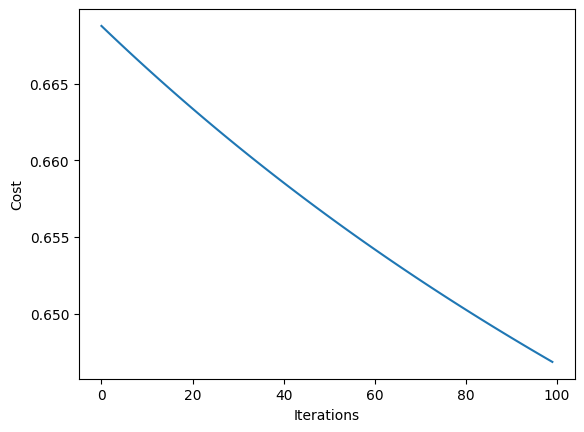

In [283]:
mlp.predict()


## Observation

With the initial parameters, the cost function doesn't look that good. It is decreasing which is a good sign but it isn't flattening out. I have tried, multiple different values but this some seems like the best fit.



In [286]:
df_norm = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)


,sepal_length,sepal_width,petal_length,petal_width
149,0.444444,0.416667,0.694915,0.708333
34,0.166667,0.458333,0.084746,0.041667
89,0.333333,0.208333,0.508475,0.500000
116,0.611111,0.416667,0.762712,0.708333
67,0.416667,0.291667,0.525424,0.375000


In [233]:
target = data[['species']].replace(['setosa','versicolor','virginica'],[0,1,2])
target.sample(n=5)

,species
139,2
89,1
115,2
122,2
5,0


In [234]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
18,0.388889,0.750000,0.118644,0.083333,0
70,0.444444,0.500000,0.644068,0.708333,1
84,0.305556,0.416667,0.593220,0.583333,1
62,0.472222,0.083333,0.508475,0.375000,1
27,0.250000,0.625000,0.084746,0.041667,0


In [236]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [242]:
columns = df.columns.drop('species')
X = df[columns]

y = df.species

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [247]:
class MLP:
    def __init__(self, epochs, learning_rate, input_layer,hidden_layer,output_layer, reg_param = 0,m=4):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.input_layer = input_layer
        self.hidden_layer = hidden_layer
        self.output_layer = output_layer
        self.reg_param = reg_param 
        self.m = m
        self.W1 = np.random.normal(0,1,(hidden_layer,input_layer))
        self.W2 = np.random.normal(0,1,(output_layer,hidden_layer))
        self.B1 = np.random.random((hidden_layer, 1)) # 2x1
        self.B2 = np.random.random((output_layer, 1)) # 1x1
        self.cost = np.zeros((self.epochs, 1))

    
    #Activation function
    def sigmoid(self, z, derv=False):
        if derv: return z * (1 - z)
        return 1 / (1 + np.exp(-z))
    def forward(self, x, predict=False):
        a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

        z2 = self.W1.dot(a1) + self.B1 # 2x2 * 2x1 + 2x1 = 2x1
        a2 = self.sigmoid(z2) # 2x1

        z3 = self.W2.dot(a2) + self.B2 # 1x2 * 2x1 + 1x1 = 1x1
        a3 = sigmoid(z3)

        if predict: return a3
        return (a1, a2, a3)
    def train(self): # The arguments are to bypass UnboundLocalError error
        for i in range(self.epochs):
            c = 0
            
        
            dW1 = 0
            dW2 = 0

            dB1 = 0
            dB2 = 0
        
            for j in range(self.m):
                print("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
                a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

                z1 = self.W1.dot(a0) + self.B1 # 2x2 * 2x1 + 2x1 = 2x1
                a1 = self.sigmoid(z1) # 2x1

                z2 = self.W2.dot(a1) + self.B2 # 1x2 * 2x1 + 1x1 = 1x1
                a2 = self.sigmoid(z2) # 1x1

                # Back prop.
                dz2 = a2 - y[j] # 1x1
                dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

                dz1 = np.multiply((self.W2.T * dz2), self.sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
                dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

                dB1 += dz1 # 2x1
                dB2 += dz2 # 1x1

                c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
            
            self.W1 = self.W1 - self.learning_rate * (dW1 / self.m) + ( (self.reg_param / self.m) * self.W1)
            self.W2 = self.W2 - self.learning_rate * (dW2 / self.m) + ( (self.reg_param / self.m) * self.W2)

            self.B1 = self.B1 - self.learning_rate * (dB1 / self.m)
            self.B2 = self.B2 - self.learning_rate * (dB2 / self.m)
            self.cost[i] = (c / self.m) + ( 
            (self.reg_param / (2 * self.m)) * 
            (
                np.sum(np.power(self.W1, 2)) + 
                np.sum(np.power(self.W2, 2))
            )
            )
        return (self.W1, self.W2, self.B1, self.B2)
    def predict(self):
        # Assigning the axes to the different elements.
        plt.plot(range(self.epochs),self. cost)

        # Labelling the x axis as the iterations axis.
        plt.xlabel("Iterations")

    # Labelling the y axis as the cost axis.
        plt.ylabel("Cost")

        # Showing the plot.
        plt.show()


        
        
        
    

array([[-4.04745243e-01, -3.47943889e-01,  4.46396064e-01,
        -1.41449056e-01],
       [-2.70589680e-01,  1.19419379e-01, -2.72792188e-01,
        -1.92004094e-01],
       [ 3.44449572e-01,  5.10917533e-02,  4.44596169e-01,
        -1.59260067e-01],
       [ 4.69520828e-02, -8.29432637e-02,  3.62004460e-01,
         4.37726642e-01],
       [-4.53777628e-01, -6.26687506e-02,  4.43059805e-01,
        -3.11381510e-01],
       [-2.22310816e-01,  4.09971049e-01,  1.87330619e-01,
         1.35344327e-01],
       [-2.40849240e-01, -4.36966443e-01, -1.14267150e-01,
         2.26472297e-01],
       [ 1.28234098e-01, -2.86095540e-01,  2.54299526e-01,
         4.16389119e-01],
       [-2.12896089e-01,  6.16480189e-02,  1.40385531e-01,
         4.98087431e-02],
       [ 9.10316589e-04,  5.99601875e-02, -2.42326800e-01,
        -2.59892614e-01],
       [ 3.38673583e-01, -1.82156595e-01, -4.11265482e-01,
         1.55827646e-01],
       [-4.00863083e-02, -2.09998575e-02, -3.73304663e-01,
      